In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import lightgbm

In [3]:
df=pd.read_csv('labeled_data2.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol',
       'timestamp', 'flow_duration', 'flow_byts_s', 'flow_pkts_s',
       'fwd_pkts_s', 'bwd_pkts_s', 'tot_fwd_pkts', 'tot_bwd_pkts',
       'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'pkt_len_max', 'pkt_len_min', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fwd_header_len', 'bwd_header_len',
       'fwd_seg_size_min', 'fwd_act_data_pkts', 'flow_iat_mean',
       'flow_iat_max', 'flow_iat_min', 'flow_iat_std', 'fwd_iat_tot',
       'fwd_iat_max', 'fwd_iat_min', 'fwd_iat_mean', 'fwd_iat_std',
       'bwd_iat_tot', 'bwd_iat_max', 'bwd_iat_min', 'bwd_iat_mean',
       'bwd_iat_std', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags',
       'bwd_urg_flags', 'fin_flag_cnt', 'syn_flag_cnt', 'rst_flag_cnt',
       'psh_flag_cnt', 'ack_flag_c

In [5]:
df.head()

,Unnamed: 0,src_ip,dst_ip,src_port,dst_port,protocol,timestamp,flow_duration,flow_byts_s,flow_pkts_s,...,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwe_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,Label
0,0,10.215.173.1,157.240.16.32,48924,443,6,2021-09-15 15:33:24,2525190.0,2094.495860,8.316206,...,0.000000,0.0,126.400000,365.909091,0,10,11,1264,4025,benign
1,1,10.215.173.1,10.215.173.2,16658,53,17,2021-09-15 15:33:24,43626.0,4148.902031,45.844221,...,0.000000,0.0,68.000000,113.000000,0,1,1,68,113,benign
2,2,10.215.173.1,157.240.16.53,37292,5222,6,2021-09-15 15:33:24,2504540.0,735.065122,9.183323,...,71225.071225,0.0,70.454545,88.833333,0,11,12,775,1066,benign
3,3,192.168.101.162,172.217.160.162,39604,443,17,2021-09-15 15:33:24,270572.0,1075.499313,18.479370,...,0.000000,0.0,61.666667,53.000000,0,3,2,185,106,benign
4,4,10.215.173.1,192.168.101.238,44848,53,17,2021-09-15 15:33:24,230191.0,981.793380,8.688437,...,0.000000,0.0,77.000000,149.000000,0,1,1,77,149,benign


In [6]:
ack = df['ack_flag_cnt']
pd.unique(ack)

array([0], dtype=int64)

In [7]:
init = df['init_fwd_win_byts']
pd.unique(init)

array([65535,     0,  2048,  2546], dtype=int64)

In [8]:
seg = df['fwd_seg_size_min'].tolist()
pd.unique(seg)

array([20,  8])

In [9]:
iat = df['fwd_iat_tot']
pd.unique(iat)


array([ 582767.,       0.,  862174., ..., 1423555.,  238581.,  421291.])

In [10]:
flow = df['flow_duration']
pd.unique(flow)


array([2525190.,   43626., 2504540., ...,  296628.,  163704.,  570809.])

In [11]:
label = df['Label']
pd.unique(label)

array(['benign', 'attack'], dtype=object)

In [12]:
data = [df["ack_flag_cnt"], df["init_fwd_win_byts"],df["fwd_seg_size_min"], df["fwd_iat_tot"],df["flow_duration"], df["Label"]]

In [13]:
headers = ["ack", "init","seg","iat","flow","label"]

In [14]:
df1 = pd.concat(data, axis=1, keys=headers)

In [15]:
df1

,ack,init,seg,iat,flow,label
0,0,65535,20,582767.0,2525190.0,benign
1,0,0,8,0.0,43626.0,benign
2,0,65535,20,862174.0,2504540.0,benign
3,0,0,8,270572.0,270572.0,benign
4,0,0,8,0.0,230191.0,benign
...,...,...,...,...,...,...
54961,0,0,8,0.0,134195.0,benign
54962,0,0,8,0.0,136412.0,benign
54963,0,0,8,238581.0,296628.0,benign
54964,0,0,8,0.0,163704.0,benign


## Model Creation

In [16]:
df1=pd.read_csv('labeled_data_attributes.csv')

In [17]:
from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder

In [18]:
# label encoding for Y values
Encoder = LabelEncoder()
le = Encoder.fit(df1["label"])
df1["label"] = le.transform(df1["label"])

In [19]:
le.inverse_transform([0])

array(['attack'], dtype=object)

In [20]:
pd.unique(df1['label'])
# 1 = Benign
# 0 = Attack

array([1, 0])

In [21]:
df1.columns

Index(['Unnamed: 0', 'ack', 'init', 'seg', 'iat', 'flow', 'label'], dtype='object')

In [22]:
df1.drop('Unnamed: 0',inplace=True,axis=1)

In [23]:
df1

,ack,init,seg,iat,flow,label
0,0,65535,20,582767.0,2525190.0,1
1,0,0,8,0.0,43626.0,1
2,0,65535,20,862174.0,2504540.0,1
3,0,0,8,270572.0,270572.0,1
4,0,0,8,0.0,230191.0,1
...,...,...,...,...,...,...
54961,0,0,8,0.0,134195.0,1
54962,0,0,8,0.0,136412.0,1
54963,0,0,8,238581.0,296628.0,1
54964,0,0,8,0.0,163704.0,1


In [24]:
X = df1.drop('label',axis=1)
y = df1['label']

In [25]:
y

0        1
1        1
2        1
3        1
4        1
        ..
54961    1
54962    1
54963    1
54964    1
54965    1
Name: label, Length: 54966, dtype: int32

In [26]:
X

,ack,init,seg,iat,flow
0,0,65535,20,582767.0,2525190.0
1,0,0,8,0.0,43626.0
2,0,65535,20,862174.0,2504540.0
3,0,0,8,270572.0,270572.0
4,0,0,8,0.0,230191.0
...,...,...,...,...,...
54961,0,0,8,0.0,134195.0
54962,0,0,8,0.0,136412.0
54963,0,0,8,238581.0,296628.0
54964,0,0,8,0.0,163704.0


In [27]:
X['init'].value_counts()

65535    54682
0          281
2048         2
2546         1
Name: init, dtype: int64

In [28]:
# train and test split from newly created dataset 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32, shuffle=True)

In [29]:
y_test.value_counts()

0    10715
1      279
Name: label, dtype: int64

In [30]:
# perform smote for the dataset to solve imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)


In [31]:
y_train.value_counts()

1    42848
0    42848
Name: label, dtype: int64

In [32]:
x_train

,ack,init,seg,iat,flow
0,0,65535,20,4.543000e+03,2.062015e+06
1,0,65535,20,5.663000e+03,2.024686e+06
2,0,65535,20,5.886000e+03,2.086372e+06
3,0,65535,20,1.591951e+07,1.742774e+07
4,0,65535,20,8.791000e+03,1.957401e+06
...,...,...,...,...,...
85691,0,65535,20,1.020856e+06,4.619955e+06
85692,0,65535,20,9.015513e+05,2.996889e+06
85693,0,65535,20,1.507197e+06,1.507269e+06
85694,0,65535,20,2.262209e+06,3.747485e+06


In [33]:
# concatenate dataset for passing to pycaret
train_dataset = pd.concat([x_train,y_train],axis=1)
test_dataset = pd.concat([x_test,y_test],axis=1)

In [35]:
train_dataset

,ack,init,seg,iat,flow,label
0,0,65535,20,4.543000e+03,2.062015e+06,0
1,0,65535,20,5.663000e+03,2.024686e+06,0
2,0,65535,20,5.886000e+03,2.086372e+06,0
3,0,65535,20,1.591951e+07,1.742774e+07,0
4,0,65535,20,8.791000e+03,1.957401e+06,0
...,...,...,...,...,...,...
85691,0,65535,20,1.020856e+06,4.619955e+06,1
85692,0,65535,20,9.015513e+05,2.996889e+06,1
85693,0,65535,20,1.507197e+06,1.507269e+06,1
85694,0,65535,20,2.262209e+06,3.747485e+06,1


In [36]:
test_dataset

,ack,init,seg,iat,flow,label
38466,0,65535,20,18225.0,1600134.0,0
39624,0,65535,20,7717.0,2260500.0,0
15118,0,65535,20,4121.0,1913340.0,0
29533,0,65535,20,9734.0,2039856.0,0
22011,0,65535,20,7345.0,1870652.0,0
...,...,...,...,...,...,...
43759,0,65535,20,36769.0,2429140.0,0
28641,0,65535,20,35490.0,1216453.0,0
16184,0,65535,20,9127.0,1988729.0,0
844,0,65535,20,5108.0,1856918.0,0


In [38]:
# pycaret init
exp = setup(data = train_dataset, target='label', train_size = 1.0, preprocess = True, test_data = test_dataset, session_id=1, use_gpu=True)

,Description,Value
0,session_id,1
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(85696, 6)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [39]:
xgb_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9916,0.9997,0.9907,0.9925,0.9916,0.9832,0.9832
1,0.9923,0.9998,0.9928,0.9918,0.9923,0.9846,0.9846
2,0.9895,0.9996,0.9923,0.9868,0.9895,0.9790,0.9790
3,0.9922,0.9998,0.9939,0.9905,0.9922,0.9844,0.9844
4,0.9907,0.9997,0.9883,0.9930,0.9906,0.9813,0.9813
5,0.9910,0.9998,0.9895,0.9925,0.9910,0.9820,0.9820
6,0.9915,0.9998,0.9900,0.9930,0.9915,0.9830,0.9830
7,0.9921,0.9998,0.9925,0.9916,0.9921,0.9841,0.9841
8,0.9928,0.9998,0.9928,0.9928,0.9928,0.9855,0.9855
9,0.9895,0.9996,0.9893,0.9897,0.9895,0.9790,0.9790


In [43]:
filename = "xbg_model.pkl"
pickle.dump(xgb_model,open(filename,'wb'))

In [54]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', use_label_encoder=True,
              validate_parameters=1, verbosity=0)

In [39]:
ada_model = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9887,0.9995,0.9893,0.9881,0.9887,0.9774,0.9774
1,0.9894,0.9995,0.9902,0.9886,0.9894,0.9788,0.9788
2,0.9868,0.9993,0.9890,0.9847,0.9868,0.9736,0.9736
3,0.9879,0.9994,0.9874,0.9883,0.9879,0.9757,0.9757
4,0.9902,0.9996,0.9897,0.9907,0.9902,0.9804,0.9804
5,0.9900,0.9991,0.9900,0.9900,0.9900,0.9799,0.9799
6,0.9894,0.9991,0.9876,0.9911,0.9894,0.9788,0.9788
7,0.9898,0.9994,0.9888,0.9909,0.9898,0.9797,0.9797
8,0.9908,0.9995,0.9916,0.9900,0.9908,0.9816,0.9816
9,0.9884,0.9992,0.9874,0.9895,0.9884,0.9769,0.9769


In [44]:
filename = "ada_model.pkl"
pickle.dump(ada_model,open(filename,'wb'))

In [40]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9959,0.9995,0.9958,0.9960,0.9959,0.9918,0.9918
1,0.9938,0.9989,0.9944,0.9932,0.9938,0.9876,0.9876
2,0.9925,0.9990,0.9951,0.9900,0.9926,0.9851,0.9851
3,0.9932,0.9991,0.9930,0.9935,0.9932,0.9865,0.9865
4,0.9943,0.9992,0.9942,0.9944,0.9943,0.9886,0.9886
5,0.9949,0.9991,0.9946,0.9951,0.9949,0.9897,0.9897
6,0.9947,0.9993,0.9932,0.9963,0.9947,0.9895,0.9895
7,0.9945,0.9994,0.9937,0.9953,0.9945,0.9890,0.9890
8,0.9943,0.9994,0.9942,0.9944,0.9943,0.9886,0.9886
9,0.9946,0.9990,0.9935,0.9958,0.9946,0.9893,0.9893


In [45]:
filename = "rf_model.pkl"
pickle.dump(rf_model,open(filename,'wb'))

In [41]:
lgbm_model=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9939,0.9999,0.9951,0.9928,0.9939,0.9879,0.9879
1,0.9932,0.9998,0.9930,0.9935,0.9932,0.9865,0.9865
2,0.9905,0.9997,0.9921,0.9891,0.9906,0.9811,0.9811
3,0.9919,0.9997,0.9904,0.9934,0.9919,0.9839,0.9839
4,0.9918,0.9998,0.9911,0.9925,0.9918,0.9837,0.9837
5,0.9924,0.9997,0.9923,0.9925,0.9924,0.9848,0.9848
6,0.9931,0.9994,0.9923,0.9939,0.9931,0.9862,0.9862
7,0.9924,0.9998,0.9914,0.9935,0.9924,0.9848,0.9848
8,0.9935,0.9998,0.9937,0.9932,0.9935,0.9869,0.9869
9,0.9922,0.9997,0.9911,0.9932,0.9922,0.9844,0.9844


In [46]:
filename = "lgbm_model.pkl"
pickle.dump(lgbm_model,open(filename,'wb'))

In [42]:
lr_model=create_model('lr') #JUST TO CHECK IF ITS SHOWING GOOD RESULTS FOR ALL

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6653,0.8725,0.3844,0.8775,0.5346,0.3307,0.3998
1,0.6739,0.8765,0.4007,0.8832,0.5513,0.3477,0.4152
2,0.6735,0.8699,0.4072,0.8712,0.5550,0.3470,0.4100
3,0.6643,0.8674,0.3909,0.8625,0.5380,0.3286,0.3925
4,0.6690,0.8719,0.3974,0.8698,0.5456,0.3379,0.4024
5,0.6692,0.8743,0.3897,0.8836,0.5409,0.3384,0.4081
6,0.6610,0.8686,0.3735,0.8786,0.5242,0.3219,0.3934
7,0.6645,0.8675,0.3856,0.8718,0.5347,0.3289,0.3963
8,0.6578,0.8738,0.3676,0.8765,0.5179,0.3157,0.3878
9,0.6616,0.8688,0.3809,0.8685,0.5295,0.3232,0.3906


## Manual training

In [41]:
x_test

,ack,init,seg,iat,flow
38466,0,65535,20,18225.0,1600134.0
39624,0,65535,20,7717.0,2260500.0
15118,0,65535,20,4121.0,1913340.0
29533,0,65535,20,9734.0,2039856.0
22011,0,65535,20,7345.0,1870652.0
...,...,...,...,...,...
43759,0,65535,20,36769.0,2429140.0
28641,0,65535,20,35490.0,1216453.0
16184,0,65535,20,9127.0,1988729.0
844,0,65535,20,5108.0,1856918.0


In [38]:
x_test.to_csv("x_test.csv")

In [42]:
y_test

38466    0
39624    0
15118    0
29533    0
22011    0
        ..
43759    0
28641    0
16184    0
844      0
28144    1
Name: label, Length: 10994, dtype: int32

In [39]:
y_test.to_csv("y_test.csv")

In [90]:
x_train

,ack,init,seg,iat,flow
0,0,65535,20,4.543000e+03,2.062015e+06
1,0,65535,20,5.663000e+03,2.024686e+06
2,0,65535,20,5.886000e+03,2.086372e+06
3,0,65535,20,1.591951e+07,1.742774e+07
4,0,65535,20,8.791000e+03,1.957401e+06
...,...,...,...,...,...
85691,0,65535,20,1.020856e+06,4.619955e+06
85692,0,65535,20,9.015513e+05,2.996889e+06
85693,0,65535,20,1.507197e+06,1.507269e+06
85694,0,65535,20,2.262209e+06,3.747485e+06


In [91]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
85691    1
85692    1
85693    1
85694    1
85695    1
Name: label, Length: 85696, dtype: int32

### Training Different Models

In [44]:
xgb = XGBClassifier(scale_pos_weight=1)
xgb_clf = xgb.fit(x_train,y_train)
predictions_xgb = xgb_clf.predict(x_test)

In [55]:
cf_matrix_xgb = confusion_matrix(y_test, predictions_xgb)
print(cf_matrix_xgb)

[[10674    41]
 [    8   271]]


<AxesSubplot:>

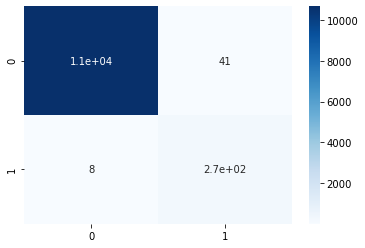

In [57]:
sns.heatmap(cf_matrix_xgb, annot=True,cmap='Blues')

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10715
           1       0.87      0.97      0.92       279

    accuracy                           1.00     10994
   macro avg       0.93      0.98      0.96     10994
weighted avg       1.00      1.00      1.00     10994



In [59]:
print("xgb Score -> ",accuracy_score(predictions_xgb, y_test)*100)
print("xgb roc_auc Score -> ",roc_auc_score(y_test,predictions_xgb))
print("f1 score ->", f1_score(y_test,predictions_xgb))

xgb Score ->  99.55430234673457
xgb roc_auc Score ->  0.983749876650995
f1 score -> 0.9170896785109983


In [60]:
filename = "xgb_model.pkl"
pickle.dump(xgb_clf,open(filename,'wb'))

# ADA BOOST

In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
ada = AdaBoostClassifier()
ada_clf = ada.fit(x_train,y_train)
predictions_ada = ada_clf.predict(x_test)

In [67]:
cf_matrix_ada = confusion_matrix(y_test, predictions_ada)
print(cf_matrix_ada)

[[10615   100]
 [    3   276]]


<AxesSubplot:>

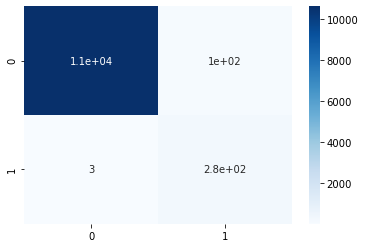

In [68]:
sns.heatmap(cf_matrix_ada, annot=True,cmap='Blues')

In [69]:
print(classification_report(y_test,predictions_ada))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     10715
           1       0.73      0.99      0.84       279

    accuracy                           0.99     10994
   macro avg       0.87      0.99      0.92     10994
weighted avg       0.99      0.99      0.99     10994



In [70]:
print("ada Score -> ",accuracy_score(predictions_ada, y_test)*100)
print("ada roc_auc Score -> ",roc_auc_score(y_test,predictions_ada))
print("ada f1 score ->", f1_score(y_test,predictions_ada))

ada Score ->  99.06312534109514
ada roc_auc Score ->  0.9899573003376836
ada f1 score -> 0.8427480916030534


In [71]:
filename = "ada_model.pkl"
pickle.dump(ada_clf,open(filename,'wb'))

# RF

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf_clf = rf.fit(x_train,y_train)
predictions_rf = rf_clf.predict(x_test)

In [73]:
cf_matrix_rf = confusion_matrix(y_test, predictions_rf)
print(cf_matrix_rf)

[[10671    44]
 [    6   273]]


<AxesSubplot:>

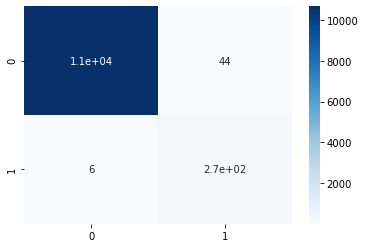

In [76]:
sns.heatmap(cf_matrix_rf, annot=True,cmap='Blues')

In [77]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10715
           1       0.86      0.98      0.92       279

    accuracy                           1.00     10994
   macro avg       0.93      0.99      0.96     10994
weighted avg       1.00      1.00      1.00     10994



In [78]:
print("rf Score -> ",accuracy_score(predictions_rf, y_test)*100)
print("rf roc_auc Score -> ",roc_auc_score(y_test,predictions_rf))
print("rf f1 score ->", f1_score(y_test,predictions_rf))

rf Score ->  99.54520647625978
rf roc_auc Score ->  0.9871941153743872
rf f1 score -> 0.9161073825503355


In [79]:
filename = "rf_model.pkl"
pickle.dump(rf_clf,open(filename,'wb'))

# LGBM

In [81]:
lgbm= lightgbm.LGBMClassifier()
lgbm_clf = lgbm.fit(x_train,y_train)
predictions_lgbm = lgbm_clf.predict(x_test)

In [84]:
cf_matrix_lgbm = confusion_matrix(y_test, predictions_lgbm)
print(cf_matrix_lgbm)

[[10638    77]
 [    9   270]]


<AxesSubplot:>

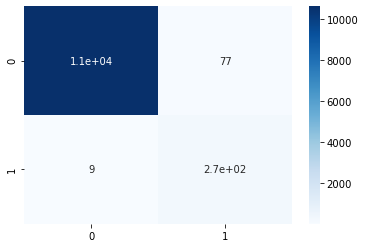

In [85]:
sns.heatmap(cf_matrix_lgbm, annot=True,cmap='Blues')

In [86]:
print("rf Score -> ",accuracy_score(predictions_lgbm, y_test)*100)
print("rf roc_auc Score -> ",roc_auc_score(y_test,predictions_lgbm))
print("rf f1 score ->", f1_score(y_test,predictions_lgbm))

rf Score ->  99.21775513916683
rf roc_auc Score ->  0.9802778739481884
rf f1 score -> 0.8626198083067093


In [87]:
filename = "lgbm_model.pkl"
pickle.dump(lgbm_clf,open(filename,'wb'))

# Running on Whole Dataset


In [74]:
whole_df = df1
whole_df

,ack,init,seg,iat,flow,label
0,1,5840,20,115799309.0,115799309,1
1,1,5840,20,113973933.0,113973933,1
2,1,5840,20,1.0,112,1
3,1,5840,20,105985004.0,105985004,1
4,1,5840,20,1.0,1,1
...,...,...,...,...,...,...
1582676,1,5840,20,1.0,1,1
1582677,1,5840,20,1.0,1,1
1582678,1,5840,20,1.0,1,1
1582679,1,5840,20,1.0,1,1


In [75]:
whole_y = whole_df['label']
whole_x = whole_df.drop(['label'],axis=1)

In [76]:
whole_x

,ack,init,seg,iat,flow
0,1,5840,20,115799309.0,115799309
1,1,5840,20,113973933.0,113973933
2,1,5840,20,1.0,112
3,1,5840,20,105985004.0,105985004
4,1,5840,20,1.0,1
...,...,...,...,...,...
1582676,1,5840,20,1.0,1
1582677,1,5840,20,1.0,1
1582678,1,5840,20,1.0,1
1582679,1,5840,20,1.0,1


In [77]:
whole_x

,ack,init,seg,iat,flow
0,1,5840,20,115799309.0,115799309
1,1,5840,20,113973933.0,113973933
2,1,5840,20,1.0,112
3,1,5840,20,105985004.0,105985004
4,1,5840,20,1.0,1
...,...,...,...,...,...
1582676,1,5840,20,1.0,1
1582677,1,5840,20,1.0,1
1582678,1,5840,20,1.0,1
1582679,1,5840,20,1.0,1


In [78]:
whole_predict_xgb = xgb_clf.predict(whole_x)

In [89]:
print(classification_report(whole_y,whole_predict_xgb))
conf_mat_xgb = confusion_matrix(whole_y,whole_predict_xgb)
print(conf_mat_xgb)

              precision    recall  f1-score   support

           0       0.31      1.00      0.48       392
           1       1.00      1.00      1.00   1582289

    accuracy                           1.00   1582681
   macro avg       0.66      1.00      0.74   1582681
weighted avg       1.00      1.00      1.00   1582681

[[    392       0]
 [    863 1581426]]


In [91]:
whole_predict_ada = ada_clf.predict(whole_x)
print(classification_report(whole_y,whole_predict_ada))
conf_mat_xgb = confusion_matrix(whole_y,whole_predict_ada)
print(conf_mat_xgb)

              precision    recall  f1-score   support

           0       0.46      1.00      0.63       392
           1       1.00      1.00      1.00   1582289

    accuracy                           1.00   1582681
   macro avg       0.73      1.00      0.81   1582681
weighted avg       1.00      1.00      1.00   1582681

[[    391       1]
 [    466 1581823]]


In [99]:
whole_predict_rf = rf_clf.predict(whole_x)
print(classification_report(whole_y,whole_predict_rf))
conf_mat_xgb = confusion_matrix(whole_y,whole_predict_rf)
print(conf_mat_xgb)

              precision    recall  f1-score   support

           0       0.45      1.00      0.62       392
           1       1.00      1.00      1.00   1582289

    accuracy                           1.00   1582681
   macro avg       0.72      1.00      0.81   1582681
weighted avg       1.00      1.00      1.00   1582681

[[    391       1]
 [    479 1581810]]


In [100]:
whole_predict_lgbm = lgbm_clf.predict(whole_x)
print(classification_report(whole_y,whole_predict_lgbm))
conf_mat_xgb = confusion_matrix(whole_y,whole_predict_lgbm)
print(conf_mat_xgb)

              precision    recall  f1-score   support

           0       0.46      1.00      0.63       392
           1       1.00      1.00      1.00   1582289

    accuracy                           1.00   1582681
   macro avg       0.73      1.00      0.81   1582681
weighted avg       1.00      1.00      1.00   1582681

[[    392       0]
 [    467 1581822]]
